## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import adjusted_rand_score
from sklearn.manifold import TSNE
import time
import sys
from BLCC import MixtureModelBernoulli

# Get data
df = pd.read_csv("../Data/NSI/narcissistic_personality_inventory.csv",index_col=0)

# Run model

In [3]:
num_classes = 8
random_state = 100
max_iter = 300
burn_in = 100

print("Data Size")
print("---------")
print(f"Samples: {df.shape[0]}")
print(f"Features: {df.shape[1]}")

# Set up model
C_list = MixtureModelBernoulli(num_classes=num_classes,
                               random_state=random_state,
                               burn_in=burn_in,
                               max_iter=max_iter)


# fit the data to the model
print(f"\nRunning {max_iter} iterations...",end="")
start_time = time.time()
C_list.fit(df)
total_time = time.time() - start_time

print("DONE!")
print(f"Total time: {round(total_time,5)} (secs)")

# Get parameter estimates
theta, pi, k = C_list.get_params()

Data Size
---------
Samples: 11243
Features: 40

Running 300 iterations...DONE!
Total time: 510.47025 (secs)


# Print Parameters

## Pi

In [4]:
# pi = pd.DataFrame(pi)
# pi.columns = ["Probability"]
# pi.index = [f"Cluster {x}" for x in np.arange(0,len(pi)).astype(str)]
# display(pi)
k

array([3, 0, 3, ..., 4, 7, 3], dtype=int64)

## Theta

In [5]:
theta = pd.DataFrame(theta)
theta.columns = [f"Item {x}" for x in np.arange(1,theta.shape[1]+1).astype(str)]
theta.index = [f"Cluster {x}" for x in np.arange(0,theta.shape[0]).astype(str)]
display(theta)

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,...,Item 31,Item 32,Item 33,Item 34,Item 35,Item 36,Item 37,Item 38,Item 39,Item 40
Cluster 0,0.352639,0.044217,0.049602,0.015785,0.164448,0.098886,0.051890,0.273842,0.131713,0.217578,...,0.148799,0.042563,0.126904,0.096931,0.029311,0.005619,0.119421,0.015021,0.119224,0.081124
Cluster 1,0.338885,0.215325,0.119649,0.121614,0.477328,0.412436,0.130205,0.645460,0.619313,0.200763,...,0.434209,0.198963,0.336137,0.230449,0.208117,0.017735,0.305576,0.111702,0.525470,0.503616
Cluster 2,0.774387,0.242549,0.176877,0.144878,0.343806,0.327617,0.790475,0.612930,0.421904,0.640157,...,0.286537,0.329750,0.604483,0.203061,0.140249,0.161072,0.397546,0.096889,0.280474,0.399430
Cluster 3,0.872554,0.352719,0.243380,0.316686,0.798855,0.709333,0.374018,0.839471,0.778244,0.880971,...,0.721066,0.709137,0.860893,0.576534,0.622089,0.554284,0.395842,0.140438,0.783574,0.763130
Cluster 4,0.475309,0.148991,0.141604,0.102938,0.226034,0.232740,0.224188,0.483516,0.406001,0.266874,...,0.343356,0.063509,0.154642,0.295167,0.105617,0.022072,0.295136,0.150379,0.191651,0.328767
Cluster 5,0.777748,0.391580,0.312210,0.380799,0.598742,0.562862,0.623360,0.816430,0.780287,0.677650,...,0.644546,0.428885,0.623358,0.587079,0.488267,0.268723,0.499218,0.382571,0.526295,0.758639
Cluster 6,0.957996,0.704597,0.548803,0.760572,0.924587,0.937908,0.877319,0.941381,0.935682,0.958150,...,0.899404,0.925809,0.945496,0.813886,0.869652,0.846969,0.706765,0.675225,0.909414,0.942079
Cluster 7,0.779356,0.070479,0.096939,0.064151,0.431500,0.308151,0.039757,0.607269,0.305956,0.770108,...,0.388381,0.335697,0.558133,0.312040,0.235220,0.179655,0.167599,0.020203,0.360749,0.288680


## K

In [6]:
k = pd.DataFrame(k)
k.columns = ["Avg Class"]
k.index = [f"Subject {x}" for x in np.arange(1,len(k)+1).astype(str)]
display(k)

,Avg Class
Subject 1,3
Subject 2,0
Subject 3,3
Subject 4,6
Subject 5,0
...,...
Subject 11239,0
Subject 11240,4
Subject 11241,4
Subject 11242,7


## Class Membership

In [7]:
memebership = C_list.get_class_membership_scores()
memebership = pd.DataFrame(memebership)
memebership.columns = [f"Cluster {x}" for x in np.arange(0,memebership.shape[1]).astype(str)]
memebership.index = [f"Subject {x}" for x in np.arange(1,memebership.shape[0]+1).astype(str)]
display(memebership)

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6,Cluster 7
Subject 1,3.678114e-08,1.996894e-02,3.768146e-03,7.865456e-01,1.001453e-05,1.376774e-02,3.142777e-08,1.759394e-01
Subject 2,5.042535e-01,4.345406e-03,5.452204e-05,2.616144e-12,4.902328e-01,1.262409e-07,3.706055e-25,1.113693e-03
Subject 3,2.489093e-21,5.144791e-09,1.554928e-07,9.810441e-01,1.369081e-15,1.739711e-04,1.878176e-02,8.840786e-09
Subject 4,9.815207e-24,8.383864e-11,4.112456e-08,3.328867e-01,2.633883e-16,1.207576e-04,6.669925e-01,1.088182e-10
Subject 5,9.192943e-01,1.544390e-04,2.369284e-04,3.038623e-10,1.837177e-03,2.712544e-09,1.800639e-25,7.847713e-02
...,...,...,...,...,...,...,...,...
Subject 11239,9.998646e-01,4.891872e-06,1.873529e-06,2.327540e-15,8.410457e-05,3.276709e-13,2.456306e-32,4.456977e-05
Subject 11240,1.121869e-04,1.228411e-04,8.499184e-04,3.135671e-11,9.987619e-01,7.248701e-05,1.508784e-20,8.064404e-05
Subject 11241,1.571134e-01,1.242206e-03,3.375981e-04,7.883698e-12,8.397970e-01,4.633143e-07,1.187018e-24,1.509270e-03
Subject 11242,1.012861e-03,1.177775e-02,4.855255e-03,8.865490e-06,3.463965e-01,2.587156e-03,2.090479e-16,6.333616e-01


With a score of .968 the clusters are almost equivalent. This gives us strong evidence the algorithm is able to accurately cluster the subjects.

# Analyze Convergence

## Thetas

(299, 8, 40)


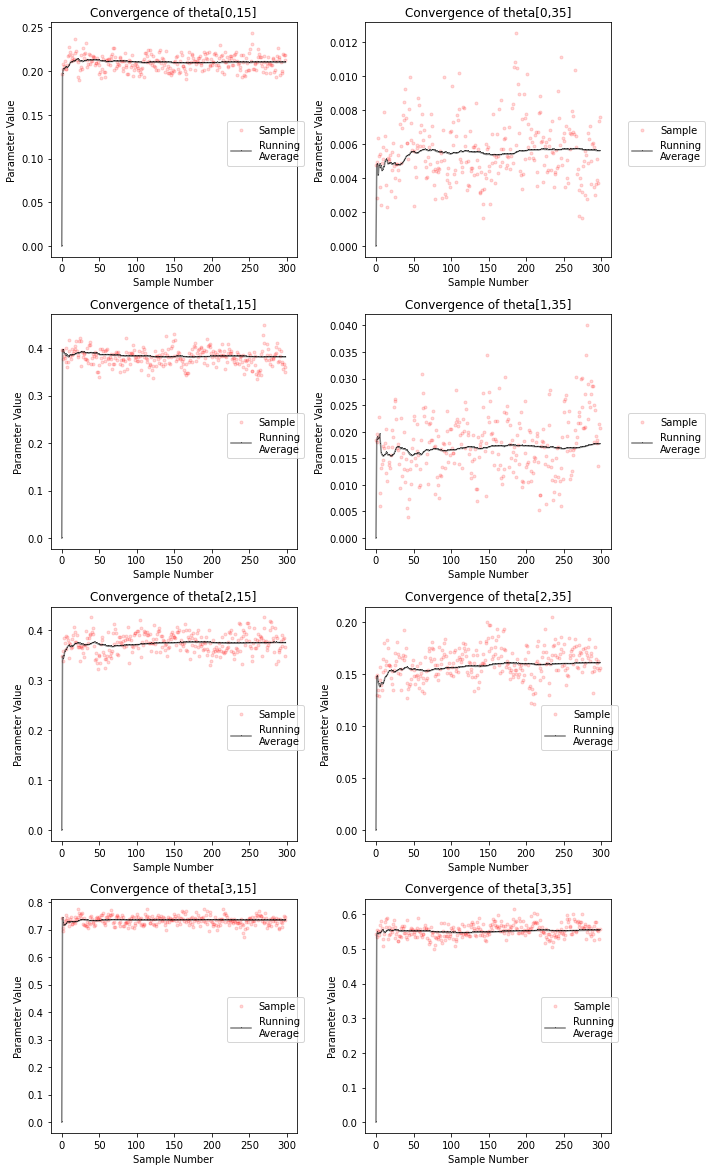

In [8]:
np.random.RandomState(100)
number_of_rows = 5
number_of_cols = 2
samples_theta_params = C_list.samples_theta_params
print(samples_theta_params.shape)

# Get random indexes
c_range = [0,1,2,3]
j_range = np.random.choice(np.arange(0,samples_theta_params.shape[2]),number_of_cols)


plt.figure(figsize=(10,20))
num_plot = 1
for c in c_range:
    for j in j_range:
        running_avg = np.zeros(samples_theta_params.shape[0])
        for num_sample in range(1,samples_theta_params.shape[0]):
            running_avg[num_sample] = np.average(samples_theta_params[:num_sample, c, j])

        plt.subplot(number_of_rows,number_of_cols,num_plot)
        # Plot samples
        plt.plot(samples_theta_params[:, c, j], ".r", label="Sample",alpha=.15)
        # Plot running avg
        plt.plot(running_avg, "-k,", label="Running\nAverage",alpha=.5)
        
        plt.xlabel("Sample Number")
        plt.ylabel("Parameter Value")
        plt.title(f"Convergence of theta[{c},{j}]")
        plt.legend(bbox_to_anchor = (1.05, 0.6))
        num_plot += 1
plt.tight_layout()

## k

(299, 11243)


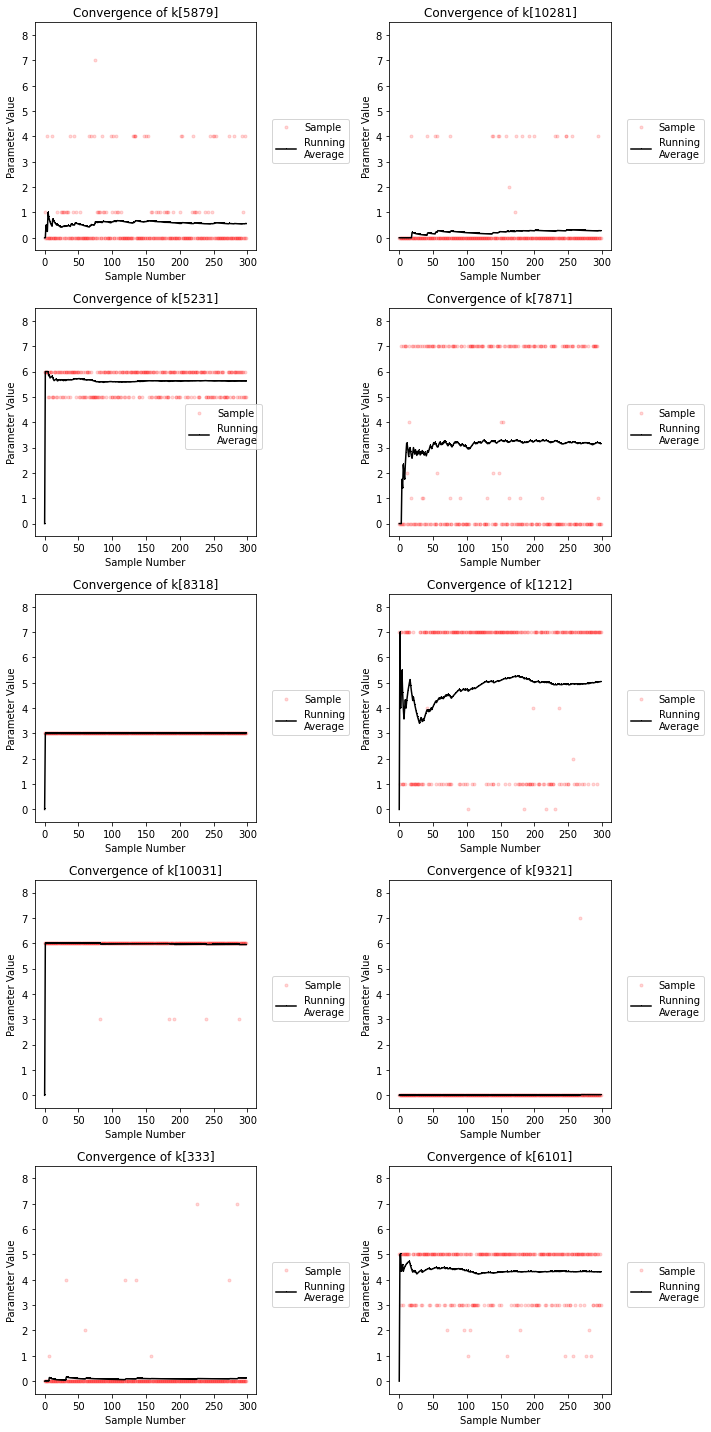

In [9]:
samples_class_assignments = C_list.samples_class_assignments
print(samples_class_assignments.shape)

# Get random indexes
i_range = np.random.choice(np.arange(0,samples_class_assignments.shape[1]),number_of_cols*number_of_rows)

plt.figure(figsize=(10,20))
num_plot = 1
for i in i_range:
    running_avg = np.zeros(samples_class_assignments.shape[0])
    for num_sample in range(1,samples_class_assignments.shape[0]):
        running_avg[num_sample] = np.average(samples_class_assignments[:num_sample, i])

    plt.subplot(number_of_rows,number_of_cols,num_plot,alpha=.5)
    # Plot samples
    plt.plot(samples_class_assignments[:, i], ".r", label="Sample",alpha=.15)
    # Plot running avg
    plt.plot(running_avg, "-k,", label="Running\nAverage")
    plt.xlabel("Sample Number")
    plt.ylabel("Parameter Value")
    plt.title(f"Convergence of k[{i}]")
    plt.legend(bbox_to_anchor = (1.05, 0.6))
    plt.ylim(-.5,num_classes+.5)
    num_plot += 1
plt.tight_layout()

## pi

(299, 8)


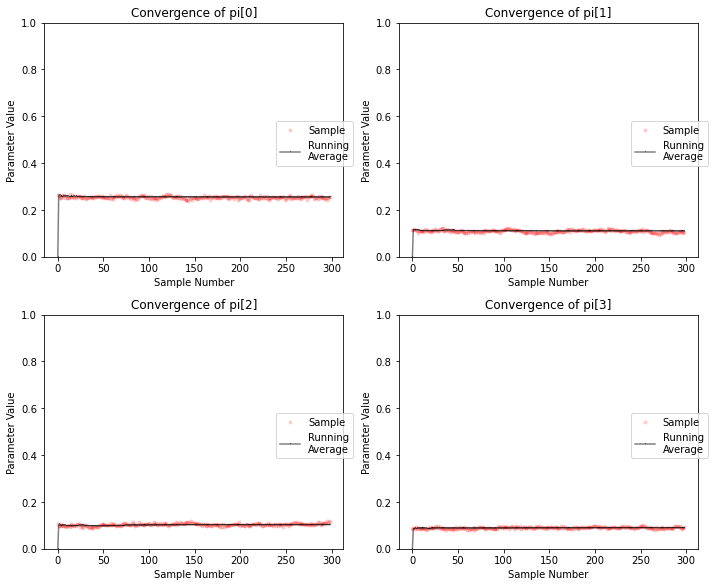

In [10]:
samples_class_probabilities = C_list.samples_class_probabilities
print(samples_class_probabilities.shape)


plt.figure(figsize=(10,20))
num_plot = 1
for c in c_range:
    running_avg = np.zeros(samples_class_probabilities.shape[0])
    for num_sample in range(1,samples_class_probabilities.shape[0]):
        running_avg[num_sample] = np.average(samples_class_probabilities[:num_sample, c])

    plt.subplot(number_of_rows,number_of_cols,num_plot)
    # Plot samples
    plt.plot(samples_class_probabilities[:, c], ".r", label="Sample",alpha=.15)
    # Plot running avg
    plt.plot(running_avg, "-k,", label="Running\nAverage",alpha=.5)
    plt.xlabel("Sample Number")
    plt.ylabel("Parameter Value")
    plt.title(f"Convergence of pi[{c}]")
    plt.legend(bbox_to_anchor = (1.05, 0.6))
    plt.ylim(0,1)
    num_plot += 1
plt.tight_layout()

# Monte Carlo Simulations

## Running simulations

In [11]:
num_simulations = 1 # Recommended 100
mc_samples_theta = []
mc_samples_pi = []
mc_samples_k = []
mc_samples_true_k = []
mc_samples_assignments = []
mc_samples_times = []

# todo find the bias, and root mean square error

for num_sim in range(num_simulations):
    # Sample new data
    mc_data, mc_k = C_list.resample(df.shape[0])
    
    # Set up model
    C_temp = MixtureModelBernoulli(num_classes=num_classes,
                                   random_state=random_state,
                                   burn_in=burn_in,
                                   max_iter=max_iter)

    # fit the data to the model
    print(f"\nRunning simulation {num_sim}/{num_simulations}...",end="")
    start_time = time.time()
    C_temp.fit(mc_data)
    total_time = time.time() - start_time
    print("DONE!")
    print(f"Total time: {round(total_time,5)} (secs)")
    
    # Append simulation data
    theta_temp, pi_temp, k_temp = C_temp.get_params()
    mc_samples_theta.append(theta_temp)
    mc_samples_pi.append(pi_temp)
    mc_samples_k.append(k_temp)
    mc_samples_true_k.append(mc_k)
    mc_samples_assignments.append(C_temp.get_class_membership_scores())
    mc_samples_times.append(total_time)


Running simulation 0/1...DONE!
Total time: 514.37733 (secs)
